In [35]:
import numpy as np
import pandas as pd 
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [36]:
# df_rtr = pd.read_json("data.zip/renttherunway_final_data.json", lines=True)
# pd.read_csv('data.zip', compression='zip')

# Open the zip file
with zipfile.ZipFile('data.zip') as z:
    # Open the JSON file
    with z.open('data/renttherunway_final_data.json') as f:
        df_rtr = pd.read_json(f, lines=True)

df_rtr.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [37]:
df_rtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [38]:
df_rtr.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [39]:
df_rtr.duplicated().sum()

189

In [40]:
# Remove duplicate rows
df_rtr = df_rtr.drop_duplicates()

In [41]:
df_rtr.isnull().sum()

fit                   0
user_id               0
bust size         18392
item_id               0
weight            29955
rating               81
rented for           10
review_text           0
body type         14625
review_summary        0
category              0
height              675
size                  0
age                 960
review_date           0
dtype: int64

In [42]:
# Calculate the percentage of missing values in each column
(df_rtr.isnull().sum() * 100 / len(df_rtr)).round(2)

fit                0.00
user_id            0.00
bust size          9.56
item_id            0.00
weight            15.57
rating             0.04
rented for         0.01
review_text        0.00
body type          7.60
review_summary     0.00
category           0.00
height             0.35
size               0.00
age                0.50
review_date        0.00
dtype: float64

In [43]:
df_rtr['fit'].value_counts()

fit
fit      141909
small     25747
large     24699
Name: count, dtype: int64

In [44]:
df_rtr['bust size'].value_counts()

bust size
34b    27255
34c    23117
34d    18013
36c    13502
32d    11188
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: count, Length: 106, dtype: int64

In [53]:
df_rtr['rented for'].value_counts()

rented for
wedding            57737
formal affair      40380
party              35578
everyday           16810
other              15366
work               15029
date                7382
vacation            4062
party: cocktail        1
Name: count, dtype: int64

In [ ]:
# Select categorical columns
categorical_columns = df_rtr.select_dtypes(include='object').columns

# Set up the plot grid
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols  # Calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_rtr, y=col, ax=axes[i], order=df_rtr[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Remove empty plots if the number of categorical columns is odd
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

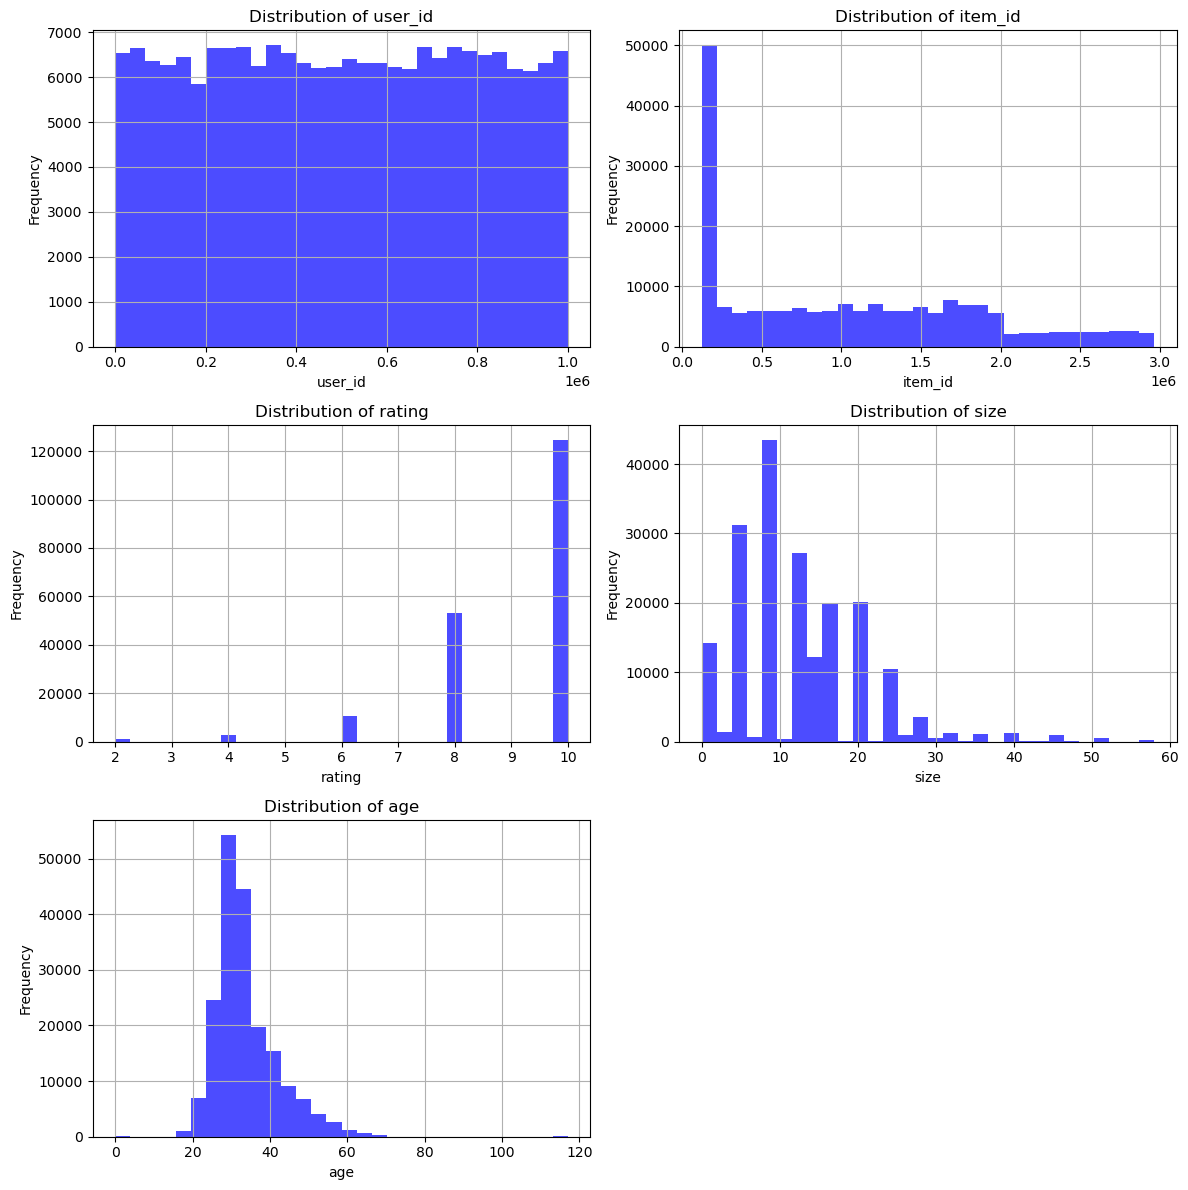

In [45]:
numeric_cols = df_rtr.select_dtypes(include=['number']).columns
n_cols = 2  # Number of plots per row
n_rows = -(-len(numeric_cols) // n_cols)  # Calculate the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df_rtr[col].hist(bins=30, ax=axes[i], alpha=0.7, color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [56]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Open the zip file
with zipfile.ZipFile('data.zip') as z:
    # Open the JSON file
    with z.open('data/renttherunway_final_data.json') as f:
        df_rtr = pd.read_json(f, lines=True)

# Custom transformer to clean the weight column
class CleanWeightTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Ensure we handle the DataFrame column correctly
        X_cleaned = X.iloc[:, 0].str.replace("lbs", "", regex=False).str.strip()
        return pd.to_numeric(X_cleaned, errors="coerce").values.reshape(-1, 1)

# Custom transformer to remove outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, method="iqr", factor=1.5):
        self.method = method
        self.factor = factor
        self.lower_bound = None
        self.upper_bound = None

    def fit(self, X, y=None):
        if self.method == "iqr":
            q1 = np.percentile(X[~np.isnan(X)], 25)
            q3 = np.percentile(X[~np.isnan(X)], 75)
            iqr = q3 - q1
            self.lower_bound = q1 - self.factor * iqr
            self.upper_bound = q3 + self.factor * iqr
        return self

    def transform(self, X, y=None):
        X_clipped = np.clip(X, self.lower_bound, self.upper_bound)
        return X_clipped

# Define preprocessing for `weight`
weight_transformer = Pipeline(steps=[
    ("clean_weight", CleanWeightTransformer()),
    ("remove_outliers", OutlierRemover()),
    ("impute_weight", SimpleImputer(strategy="median"))
])

# Define preprocessing for `bust_size`
bust_size_imputer = Pipeline(steps=[
    ("impute_bust_size", SimpleImputer(strategy="constant", fill_value="unknown"))
])

# Define preprocessing for `rating`
rating_imputer = Pipeline(steps=[
    ("impute_rating", SimpleImputer(strategy="median"))
])

# Define preprocessing for `rented for`
rented_for_imputer = Pipeline(steps=[
    ("impute_rented_for", SimpleImputer(strategy="most_frequent"))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("bust_size", bust_size_imputer, ["bust size"]),
        ("weight", weight_transformer, ["weight"]),
        ("rating", rating_imputer, ["rating"]),
        ("rented_for", rented_for_imputer, ["rented for"])
    ],
    remainder="passthrough"  # Keep other columns unchanged
)

# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

# Apply the pipeline
transformed_data = pipeline.fit_transform(df_rtr)

# Dynamically handle column names
transformed_columns = (
    ["bust size", "weight", "rating", "rented for"] +
    [col for col in df_rtr.columns if col not in ["bust size", "weight", "rating", "rented for"]]
)

# Ensure alignment of transformed data and column names
if transformed_data.shape[1] != len(transformed_columns):
    # Adjust column names to match transformed data shape
    transformed_columns = transformed_columns[:transformed_data.shape[1]]

# Create the transformed DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns)

# Reorder to match original structure, if possible
df_transformed = df_transformed.reindex(columns=df_rtr.columns, fill_value=np.nan)

# Display the first few rows of the transformed DataFrame
print(df_transformed.head())


   fit user_id bust size  item_id weight rating     rented for  \
0  fit  420272       34d  2260466  137.0   10.0       vacation   
1  fit  273551       34b   153475  132.0   10.0          other   
2  fit  360448   unknown  1063761  135.0   10.0          party   
3  fit  909926       34c   126335  135.0    8.0  formal affair   
4  fit  151944       34b   616682  145.0   10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height size  \
0                               So many compliments!   romper  5' 8"   14  

In [54]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Open the zip file
with zipfile.ZipFile('data.zip') as z:
    # Open the JSON file
    with z.open('data/renttherunway_final_data.json') as f:
        df_rtr = pd.read_json(f, lines=True)

# Custom transformer to clean the weight column
class CleanWeightTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Ensure we handle the DataFrame column correctly
        X_cleaned = X.iloc[:, 0].str.replace("lbs", "", regex=False).str.strip()
        return pd.to_numeric(X_cleaned, errors="coerce").values.reshape(-1, 1)

# Custom transformer to remove outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, method="iqr", factor=1.5):
        self.method = method
        self.factor = factor
        self.lower_bound = None
        self.upper_bound = None

    def fit(self, X, y=None):
        if self.method == "iqr":
            q1 = np.percentile(X[~np.isnan(X)], 25)
            q3 = np.percentile(X[~np.isnan(X)], 75)
            iqr = q3 - q1
            self.lower_bound = q1 - self.factor * iqr
            self.upper_bound = q3 + self.factor * iqr
        return self

    def transform(self, X, y=None):
        X_clipped = np.clip(X, self.lower_bound, self.upper_bound)
        return X_clipped

# Define preprocessing for `weight`
weight_transformer = Pipeline(steps=[
    ("clean_weight", CleanWeightTransformer()),
    ("remove_outliers", OutlierRemover()),
    ("impute_weight", SimpleImputer(strategy="median"))
])

# Define preprocessing for `bust_size`
bust_size_imputer = Pipeline(steps=[
    ("impute_bust_size", SimpleImputer(strategy="constant", fill_value="unknown"))
])

# Define preprocessing for `rating`
rating_imputer = Pipeline(steps=[
    ("impute_rating", SimpleImputer(strategy="median"))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("bust_size", bust_size_imputer, ["bust size"]),
        ("weight", weight_transformer, ["weight"]),
        ("rating", rating_imputer, ["rating"])
    ],
    remainder="passthrough"  # Keep other columns unchanged
)

# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

# Apply the pipeline
transformed_data = pipeline.fit_transform(df_rtr)

# Dynamically handle column names
transformed_columns = (
    ["bust size", "weight", "rating"] + [col for col in df_rtr.columns if col not in ["bust size", "weight", "rating"]]
)

# Ensure alignment of transformed data and column names
if transformed_data.shape[1] != len(transformed_columns):
    # Adjust column names to match transformed data shape
    transformed_columns = transformed_columns[:transformed_data.shape[1]]

# Create the transformed DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns)

# Reorder to match original structure, if possible
df_transformed = df_transformed.reindex(columns=df_rtr.columns, fill_value=np.nan)

# Display the first few rows of the transformed DataFrame
print(df_transformed.head())


   fit user_id bust size  item_id weight rating     rented for  \
0  fit  420272       34d  2260466  137.0   10.0       vacation   
1  fit  273551       34b   153475  132.0   10.0          other   
2  fit  360448   unknown  1063761  135.0   10.0          party   
3  fit  909926       34c   126335  135.0    8.0  formal affair   
4  fit  151944       34b   616682  145.0   10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height size  \
0                               So many compliments!   romper  5' 8"   14  

In [51]:


# Custom transformer to clean the weight column
class CleanWeightTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Ensure we handle the DataFrame column correctly
        X_cleaned = X.iloc[:, 0].str.replace("lbs", "", regex=False).str.strip()
        return pd.to_numeric(X_cleaned, errors="coerce").values.reshape(-1, 1)

# Custom transformer to remove outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, method="iqr", factor=1.5):
        self.method = method
        self.factor = factor
        self.lower_bound = None
        self.upper_bound = None

    def fit(self, X, y=None):
        if self.method == "iqr":
            q1 = np.percentile(X[~np.isnan(X)], 25)
            q3 = np.percentile(X[~np.isnan(X)], 75)
            iqr = q3 - q1
            self.lower_bound = q1 - self.factor * iqr
            self.upper_bound = q3 + self.factor * iqr
        return self

    def transform(self, X, y=None):
        X_clipped = np.clip(X, self.lower_bound, self.upper_bound)
        return X_clipped

# Define preprocessing for `weight`
weight_transformer = Pipeline(steps=[
    ("clean_weight", CleanWeightTransformer()),
    ("remove_outliers", OutlierRemover()),
    ("impute_weight", SimpleImputer(strategy="median"))
])

# Define preprocessing for `bust_size`
bust_size_imputer = Pipeline(steps=[
    ("impute_bust_size", SimpleImputer(strategy="constant", fill_value="unknown"))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("bust_size", bust_size_imputer, ["bust size"]),
        ("weight", weight_transformer, ["weight"])
    ],
    remainder="passthrough"  # Keep other columns unchanged
)

# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

# Apply the pipeline
transformed_data = pipeline.fit_transform(df_rtr)

# Dynamically handle column names
transformed_columns = (
    ["bust size", "weight"] + [col for col in df_rtr.columns if col not in ["bust size", "weight"]]
)

# Ensure alignment of transformed data and column names
if transformed_data.shape[1] != len(transformed_columns):
    # Adjust column names to match transformed data shape
    transformed_columns = transformed_columns[:transformed_data.shape[1]]

# Create the transformed DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns)

# Reorder to match original structure, if possible
df_transformed = df_transformed.reindex(columns=df_rtr.columns, fill_value=np.nan)

# Display the first few rows of the transformed DataFrame
print(df_transformed.head())


   fit user_id bust size  item_id weight rating     rented for  \
0  fit  420272       34d  2260466  137.0   10.0       vacation   
1  fit  273551       34b   153475  132.0   10.0          other   
2  fit  360448   unknown  1063761  135.0   10.0          party   
3  fit  909926       34c   126335  135.0    8.0  formal affair   
4  fit  151944       34b   616682  145.0   10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height size  \
0                               So many compliments!   romper  5' 8"   14  

In [47]:


# Custom transformer to clean the weight column
class CleanWeightTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Remove 'lbs', convert to numeric
        X_cleaned = X["weight"].str.replace("lbs", "").str.strip()
        X_numeric = pd.to_numeric(X_cleaned, errors="coerce")
        return X_numeric.values.reshape(-1, 1)

# Custom transformer to remove outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, method="iqr", factor=1.5):
        self.method = method
        self.factor = factor
        self.lower_bound = None
        self.upper_bound = None

    def fit(self, X, y=None):
        if self.method == "iqr":
            q1 = np.percentile(X, 25)
            q3 = np.percentile(X, 75)
            iqr = q3 - q1
            self.lower_bound = q1 - self.factor * iqr
            self.upper_bound = q3 + self.factor * iqr
        return self

    def transform(self, X, y=None):
        X_clipped = np.clip(X, self.lower_bound, self.upper_bound)
        return X_clipped

# Define preprocessing for `weight`
weight_transformer = Pipeline(steps=[
    ("clean_weight", CleanWeightTransformer()),
    ("remove_outliers", OutlierRemover()),
    ("impute_weight", SimpleImputer(strategy="median"))
])

# Define preprocessing for `bust_size`
bust_size_imputer = Pipeline(steps=[
    ("impute_bust_size", SimpleImputer(strategy="constant", fill_value="unknown"))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("bust_size", bust_size_imputer, ["bust size"]),
        ("weight", weight_transformer, ["weight"])
    ],
    remainder="passthrough"  # Keep other columns unchanged
)

# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

# Apply the pipeline
transformed_data = pipeline.fit_transform(df_rtr)

# Rebuild DataFrame with correct column names
columns_transformed = ["bust size", "weight"] + [col for col in df_rtr.columns if col not in ["bust size", "weight"]]
df_transformed = pd.DataFrame(transformed_data, columns=columns_transformed)

# Display the first few rows of the transformed DataFrame
print(df_transformed.head())


/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: Shape of passed values is (192355, 14), indices imply (192355, 15)

In [34]:
# Define preprocessing for `bust_size`
bust_size_imputer = Pipeline(steps=[
    ("impute_bust_size", SimpleImputer(strategy="constant", fill_value="unknown"))
])

# ColumnTransformer to apply the pipeline only to `bust_size`
preprocessor = ColumnTransformer(
    transformers=[
        ("bust_size", bust_size_imputer, ["bust size"])  # Targeting only the `bust size` column
    ],
    remainder="passthrough"  # Keep other columns unchanged
)

# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

# Apply the pipeline
transformed_data = pipeline.fit_transform(df_rtr)

# Rebuild DataFrame with correct column names
df_transformed = pd.DataFrame(
    transformed_data,
    columns=["bust size"] + [col for col in df_rtr.columns if col != "bust size"]
)

# Reorder columns to match the original DataFrame
df_transformed = df_transformed[df_rtr.columns]

# Display the corrected DataFrame
print(df_transformed.head())

   fit user_id bust size  item_id  weight rating     rented for  \
0  fit  420272       34d  2260466  137lbs   10.0       vacation   
1  fit  273551       34b   153475  132lbs   10.0          other   
2  fit  360448   unknown  1063761     NaN   10.0          party   
3  fit  909926       34c   126335  135lbs    8.0  formal affair   
4  fit  151944       34b   616682  145lbs   10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height size  \
0                               So many compliments!   romper  5' 8" 

In [14]:
# Define preprocessing for `bust_size`
bust_size_imputer = Pipeline(steps=[
    ("impute_bust_size", SimpleImputer(strategy="constant", fill_value="unknown"))
])

# ColumnTransformer to apply the pipeline to `bust_size`
preprocessor = ColumnTransformer(
    transformers=[
        ("bust_size", bust_size_imputer, ["bust size"])
    ],
    remainder="passthrough"  # Keep other columns unchanged
)

In [15]:
# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

In [17]:
# Apply the pipeline
df_transformed = pipeline.fit_transform(df_rtr)

In [19]:
# Convert back to DataFrame if necessary
df_transformed = pd.DataFrame(df_transformed, columns=df_rtr.columns)
df_transformed.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,34d,fit,420272,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,34b,fit,273551,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,unknown,fit,360448,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,34c,fit,909926,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,34b,fit,151944,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
